
# Sobre o Conjunto de Dados

### Visão geral do Conjunto de Dados:
O Conjunto de Dados de Saúde e Estilo de Vida do Sono é composto por 400 linhas e 13 colunas, abrangendo uma ampla gama de variáveis relacionadas ao sono e hábitos diários. Ele inclui detalhes como gênero, idade, ocupação, duração do sono, qualidade do sono, nível de atividade física, níveis de estresse, categoria de IMC (Índice de Massa Corporal), pressão arterial, frequência cardíaca, passos diários e a presença ou ausência de distúrbios do sono.

### Recursos principais do Conjunto de Dados:
* Métricas abrangentes do sono: Explore a duração, qualidade e fatores que influenciam os padrões de sono.
* Fatores de estilo de vida: Analise os níveis de atividade física, níveis de estresse e categorias de IMC.
* Saúde cardiovascular: Examine as medições da pressão arterial e frequência cardíaca.
* Análise de distúrbios do sono: Identifique a ocorrência de distúrbios do sono, como insônia e apneia do sono.

### Colunas do Conjunto de Dados:
* __ID da pessoa:__ Um identificador para cada indivíduo.
* __Gênero:__ O gênero da pessoa (Masculino/Feminino).
* __Idade:__ A idade da pessoa em anos.
* __Ocupação:__ A ocupação ou profissão da pessoa.
* __Duração do sono (horas):__ O número de horas que a pessoa dorme por dia.
* __Qualidade do sono (escala: 1-10) :__ Uma avaliação subjetiva da qualidade do sono, variando de 1 a 10.
* __Nível de atividade física (minutos/dia):__ O número de minutos que a pessoa se dedica à atividade física diariamente.
* __Nível de estresse (escala: 1-10):__ Uma avaliação subjetiva do nível de estresse experimentado pela pessoa, variando de 1 a 10.
* __Categoria de IMC:__ A categoria de IMC da pessoa (por exemplo, Abaixo do peso, Normal, Acima do peso).
* __Pressão arterial (sistólica/diastólica):__ A medição da pressão arterial da pessoa, indicada como pressão sistólica sobre pressão diastólica.
* __Frequência cardíaca (bpm):__ A frequência cardíaca em repouso da pessoa em batimentos por minuto.
* __Passos diários:__ O número de passos que a pessoa dá por dia.
* __Distúrbio do sono:__ A presença ou ausência de um distúrbio do sono na pessoa (Nenhum, Insônia, Apneia do sono).

### Detalhes sobre a coluna Distúrbio do Sono:

* __Nenhum:__ O indivíduo não apresenta nenhum distúrbio do sono específico.
* __Insônia:__ O indivíduo tem dificuldade para dormir ou permanecer dormindo, resultando em sono / * * inadequado ou de má qualidade.
* __Apneia do sono:__ O indivíduo sofre pausas na respiração durante o sono, resultando em padrões de sono interrompidos e riscos potenciais para a saúde.

# Analise Exploratoria e tratamento

In [2]:
import pandas  as pd
import seaborn as sea
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r'dataset/SleepHealthAndLifestyleDataset.csv',sep=',')

In [4]:
data.head(3)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN


### Função para plotar uma tabela

In [111]:
def tabela(data,title = 'Null',y=1.6):
    table = plt.table(
        data.values,
        colLabels=data.columns.to_list(),
        loc='center'
    )
    table.set_fontsize(29)
    table.scale(4,4)
    plt.title(title,y=y,size=20)
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
    for pos in ['right','top','bottom','left']:
        plt.gca().spines[pos].set_visible(False)
    plt.show()

### Tradução das colunas para melhor visualização e compreensão

In [5]:
colunas = [
    'ID da pessoa',
    'Gênero',
    'Idade' ,
    'Ocupação',
    'Duração do sono (horas)',
    'Qualidade do sono (escala: 1-10)',
    'Nível de atividade física (minutos/dia)',
    'Nível de estresse (escala: 1-10)',
    'Categoria de IMC',
    'Pressão arterial (sistólica/diastólica)',
    'Frequência cardíaca (bpm)',
    'Passos diários',
    'Distúrbio do sono'
]
data.columns = colunas

In [6]:
data.head(3)

,ID da pessoa,Gênero,Idade,Ocupação,Duração do sono (horas),Qualidade do sono (escala: 1-10),Nível de atividade física (minutos/dia),Nível de estresse (escala: 1-10),Categoria de IMC,Pressão arterial (sistólica/diastólica),Frequência cardíaca (bpm),Passos diários,Distúrbio do sono
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN


## Tratemento dos dados para analise
Para melhor analises dos dados se faz necessário o tratamento dos mesmo.

#### Pressão arterial (sistólica/diastólica)
Dividindo valores de transfomando em colunas 

* Pressão arterial sistólica
* Pressão arterial diastólica


In [7]:
PressaoArterial = data['Pressão arterial (sistólica/diastólica)']
PressaoArterial = PressaoArterial.reset_index()
PressaoArterial.head(3)

,index,Pressão arterial (sistólica/diastólica)
0,0,126/83
1,1,125/80
2,2,125/80


In [8]:
data[
    ['Pressão arterial sistólica','Pressão arterial diastólica']
    ] = PressaoArterial['Pressão arterial (sistólica/diastólica)'].str.split('/',expand=True)

In [9]:
data.drop(columns='Pressão arterial (sistólica/diastólica)',inplace=True)

In [10]:
data.head(3)

,ID da pessoa,Gênero,Idade,Ocupação,Duração do sono (horas),Qualidade do sono (escala: 1-10),Nível de atividade física (minutos/dia),Nível de estresse (escala: 1-10),Categoria de IMC,Frequência cardíaca (bpm),Passos diários,Distúrbio do sono,Pressão arterial sistólica,Pressão arterial diastólica
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NaN,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80


### Visualização dos dados

##### Ocupação 

In [11]:
data['Ocupação'].value_counts()

Ocupação
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [94]:
ocupacao = data.groupby(by='Ocupação')[
                    ['Duração do sono (horas)','Qualidade do sono (escala: 1-10)','Nível de estresse (escala: 1-10)']
                ].mean().reset_index()

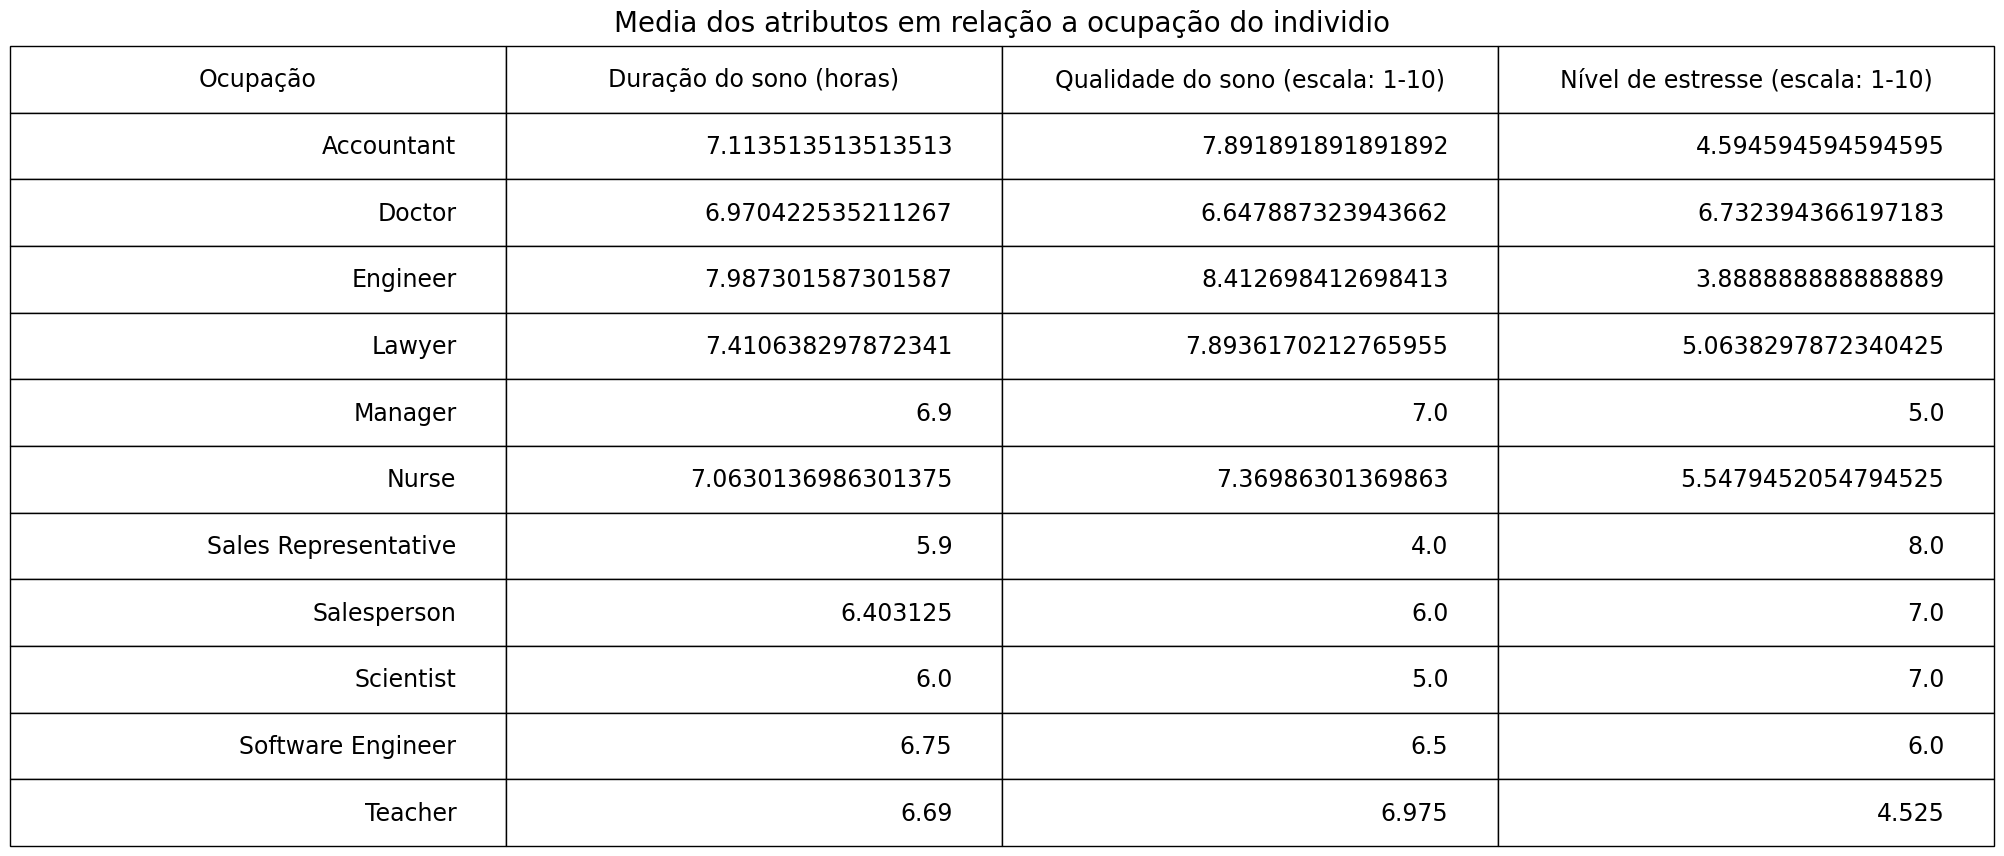

In [104]:
tabela(ocupacao,'Media dos atributos em relação a ocupação do individio',y=1.6)

#### Genero

In [115]:
genero = data.groupby(by='Gênero')[
   ['Duração do sono (horas)','Qualidade do sono (escala: 1-10)','Nível de estresse (escala: 1-10)']
    ].mean().reset_index()

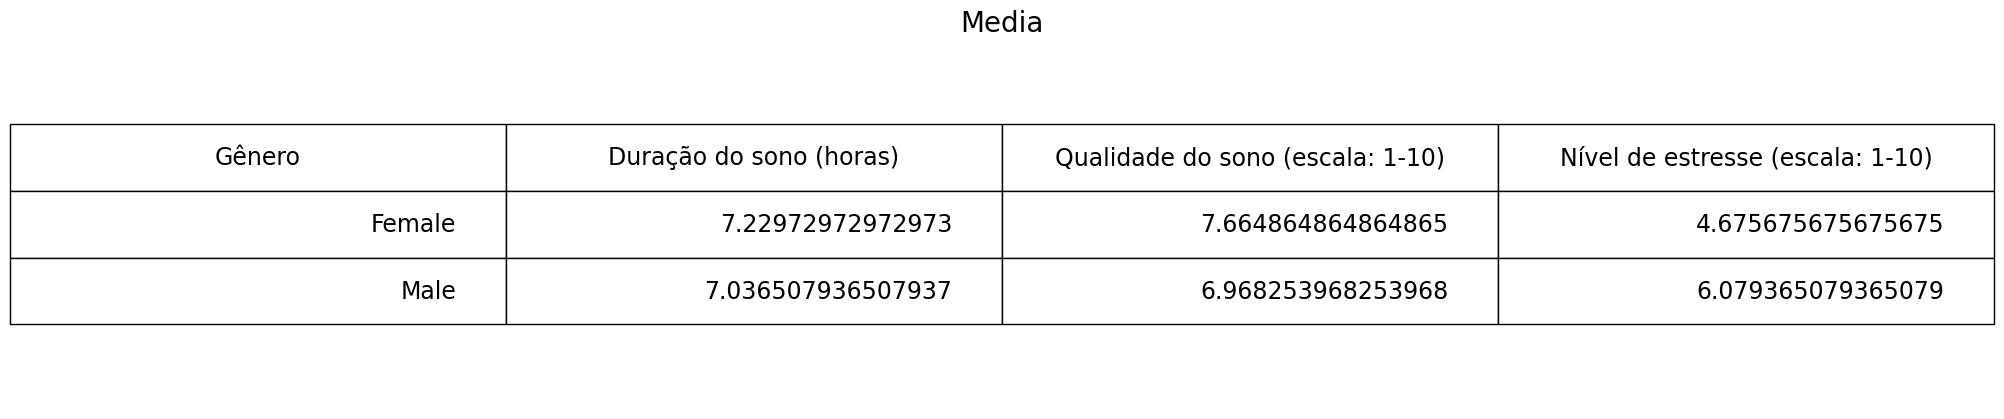

In [117]:
tabela(genero,title='Media',y=1)